# Noisy Data - Low Noise
We generated a seqeuence of rising numbers (Class 0) and falling numbers (Class 1) using C code.  
In this file, we will first visualize some of the data, and then try to classify using a Neural network.  

See the [High Noise Example](Tensorflow Week 2 - High Noise.ipynb) instead.

#### Import python libraries

In [1]:
# TensorFlow and keras
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#Import Library for csv files
import csv

# for subplots and grids
import matplotlib.gridspec as gridspec

# Display SVG files
from IPython.display import SVG
# Generate Model graph as SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


#### Read the data from the text files. There's a file with testing data, and another one with training data

In [2]:
# Import training data into reader object (the hard way)
reader = csv.reader(open("slope_data_lownoise.txt"), delimiter="\t")

# extract labels and data array from reader object
labels = []
data = []

for row in reader:
    labels.append(int(row[0]))
    rowdata = list(map(int, row[1:]))
    data.append(rowdata)
labels = np.array(labels)
data = np.array(data)
print("Data has shape", data.shape)
print("labels has shape ", labels.shape)
# Convert to one hot vectors (some keras functions only work with one hot labels)
# i.e. Convert labels like 1 2 3 4 to [1 0 0 0] [0 1 0 0] [0 0 1 0] [0 0 0 4]
categorical_labels = keras.utils.to_categorical(labels, num_classes=None)



# Import test data into reader object (the hard way)
reader = csv.reader(open("slope_test.txt"), delimiter="\t")

# extract labels and data array from reader object
traininglabels = []
trainingdata = []

for row in reader:
    traininglabels.append(int(row[0]))
    rowdata = list(map(int, row[1:]))
    trainingdata.append(rowdata)
traininglabels = np.array(labels)
trainingdata = np.array(data)
categorical_training_labels = keras.utils.to_categorical(traininglabels, num_classes=None)
print("Training Data has shape", trainingdata.shape)
print("Training labels has shape ", traininglabels.shape)
print("One Hot Training labels has shape ", categorical_training_labels.shape)

Data has shape (1000, 21)
labels has shape  (1000,)
Training Data has shape (1000, 21)
Training labels has shape  (1000,)
One Hot Training labels has shape  (1000, 2)


#### Visualize one of the signals

Text(0.5, 1.0, 'GT Class: 1')

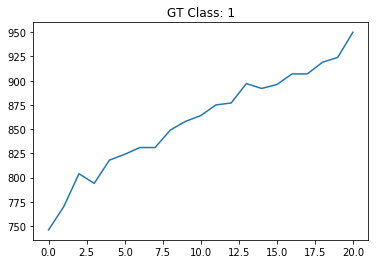

In [3]:
row = 2 # Lets visualize the third sample (0 based indexing on python)
x = data[row,:]
plt.plot(x)
text = 'GT Class: ' + str(labels[row])
plt.title(text)

#### Plot a bunch of examples labelled as class 0 in the dataset. These should slope downwards.

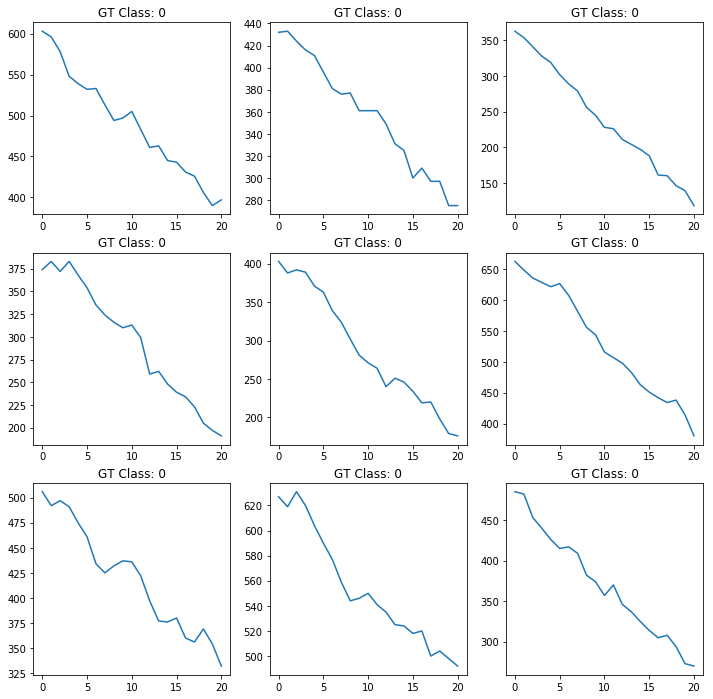

In [4]:
# We use the range(x) function, which generates integers between 0 and x (excluding x)  
# use as range(stop)  
# range([start], stop[, step])  

# Create subplot and grid
# returns fig1 (the entire figure)
# and axs1 which is a 3X3 object pointing to each of the axes (subplots)
fig1, axs1 = plt.subplots(3,3,figsize=(12, 12))

axcount = 0
for n in range(1000):
    if(labels[n] == 0):
        axs1.reshape(-1)[axcount].plot(data[n,:]) # Reshape the 3X3 to a 9X1 so we can reference by just [x] instead of [x,y]
        text = 'GT Class: ' + str(labels[n])
        axs1.reshape(-1)[axcount].set_title(text)
        axcount= axcount+1
        if(axcount > 8):
            break
    if(axcount>8):
        break

#### Plot a bunch of examples labelled as class 1 in the dataset. These should be upwards sloping.

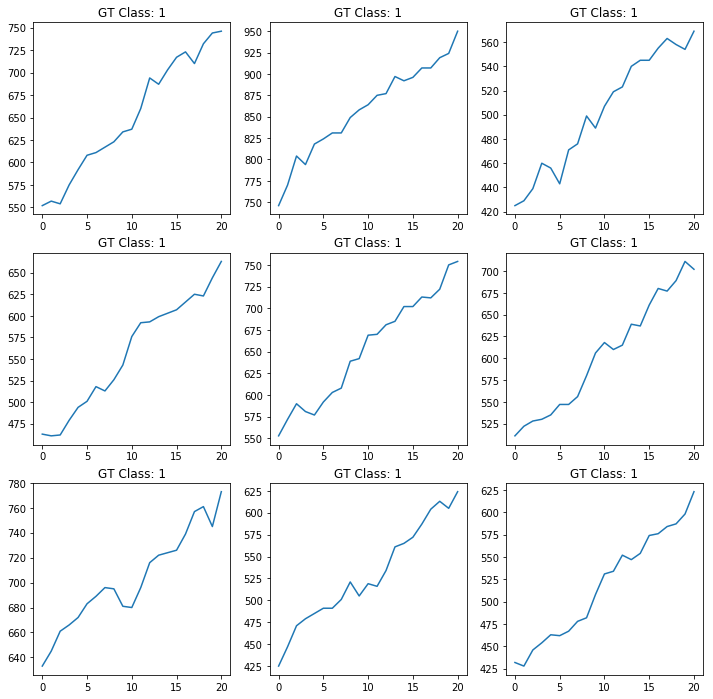

In [5]:
# Create subplot and grid
fig1, axs1 = plt.subplots(3,3,figsize=(12, 12))

axcount = 0
for n in range(1000):
    if(labels[n] == 1):
        axs1.reshape(-1)[axcount].plot(data[n,:])
        text = 'GT Class: ' + str(labels[n])
        axs1.reshape(-1)[axcount].set_title(text)
        axcount= axcount+1
        if(axcount > 8):
            break
    if(axcount>8):
        break

### Describe the network architecture and then compile it.  
This step is not run as I load the pre-trained model later. Feel free to run and experiment.

#### Notes
The original network from Tensorflow Clothing tutorial did not seem to do well, and would usually get 52% accuracy.
On training multiple times, I realized it would sometimes get 100% accuracy, but only if the first epoch hit >72% accuracy. This made me think that the initial random values (set by the initializer) were affecting things.
I also played around with each setting (one at a time) and noticed that the tanh activation did better* than relu or sigmoid.

*better = it would converge to a 100% accuracy more often

Architecture:
I was also able to get similar results with just one Dense layer (instead of the two here). This did not seem to matter.

Initializers:
The initializers set the values in the layer weight matrices before the first run.
he_normal (Xavier initialization) is know to work well, however in this case lecun_uniform worked better.

Activation:
This squishes numbers into smaller ranges (i.e. 0 - 1 or -0.5 - 0.5) so that the network can train faster and do easier math. Think of normalization in classical pattern recognition.

In [16]:
if(1):
    xa_init = keras.initializers.lecun_uniform(seed=None) # Works best

    #xa_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
    #xa_init = keras.initializers.glorot_normal(seed=None)

    model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(21,)),
    keras.layers.Dense(10, activation='tanh'),#, kernel_initializer='lecun_uniform', bias_initializer='he_normal'),
    keras.layers.Dense(10, activation='tanh'),#, kernel_initializer='lecun_uniform', bias_initializer='he_normal'),
    keras.layers.Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

 ### Train (fit) it. This model usually converges in < 10 epochs.
 I prefered to let it train and then show me a plot of accuracy vs epoch instead of text output.

This example should show how the accuracy on training set never crosses >52%

Training
Max value:  0.524  at epoch 5


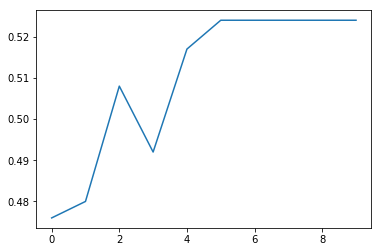

In [17]:
print("Training")
metrics = model.fit(data, labels, epochs=10, verbose=0)
plt.plot(metrics.history['acc'])
print("Max value: ", max(metrics.history['acc']), " at epoch", np.argmax(metrics.history['acc']))

Train for another 10 epochs. It now reaches 100% accuracy on the training set on epoch 7 (10+7 = 17)  
##### (You may need to compile the model again (above) to re-initialize the weights, if the accuracy doesn't increase)

Training
Max value:  1.0  at epoch 7


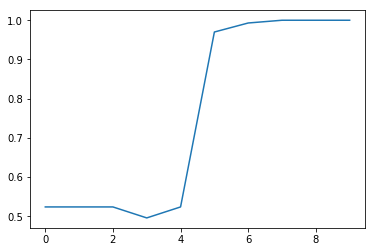

In [9]:
print("Training")
metrics = model.fit(data, labels, epochs=10, verbose=0)
plt.plot(metrics.history['acc'])
print("Max value: ", max(metrics.history['acc']), " at epoch", np.argmax(metrics.history['acc']))

In [ ]:
#Save the model. Uncomment this if you would like to save the model. 
#model.save('lownoise_2layer.h5')

In [ ]:
# Load the model
# model = load_model('lownoise_2layer.h5')

### Get a model summary and plot a graph of the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 21)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________


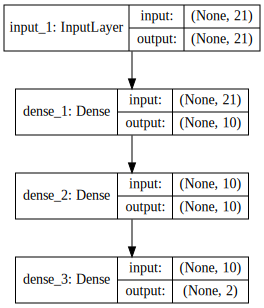

In [10]:
# Text summary
model.summary()
# SVG image (Note there's a bug which gives a weird name to the first layer)
SVG(model_to_dot(model,show_shapes=1,show_layer_names=1).create(prog='dot', format='svg'))

### Test it on the test dataset

In [19]:
print("Testing")
test_loss, test_acc = model.evaluate(trainingdata, traininglabels)
print('Test accuracy:', test_acc)

Testing
1000/1000 [==============================]1000/1000 [==============================] - 0s 87us/step

Test accuracy: 0.997


### Use this model to make predictions
I will just use some data from the test dataset and run prediction on it.

In [21]:
XPred = trainingdata[1:10,:]
YPred = traininglabels[1:10]
ynew = model.predict_classes(XPred)

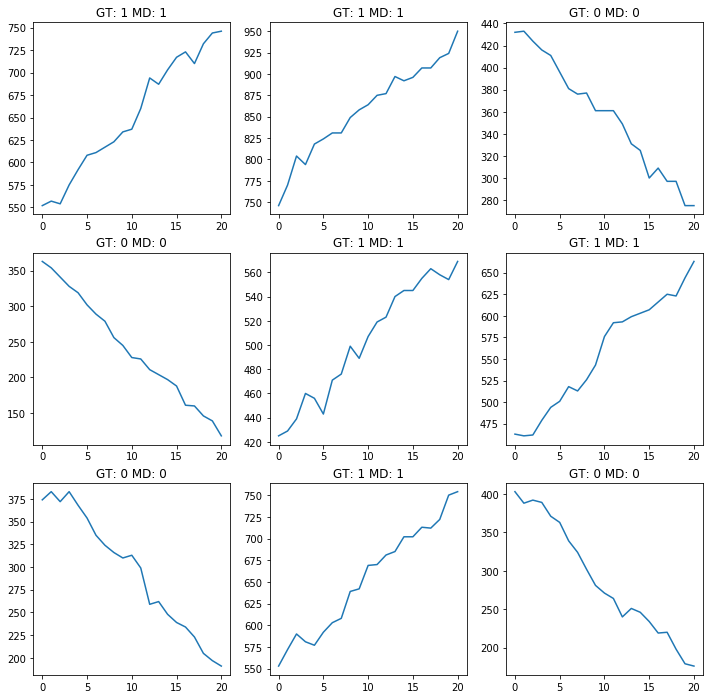

In [21]:
# Plot the data and the predictions
# Create subplot and grid
fig1, axs1 = plt.subplots(3,3,figsize=(12, 12))

axcount = 0
for n in range(9):
        pl = axs1.reshape(-1)[axcount].plot(XPred[n,:])
        text = 'GT: ' + str(YPred[n]) + ' MD: ' + str(ynew[n])
        axs1.reshape(-1)[axcount].set_title(text)
        axcount= axcount+1
        if(axcount > 8):
            break

##### Lets do some error analysis
We'll look at examples that were predicted as the wrong class

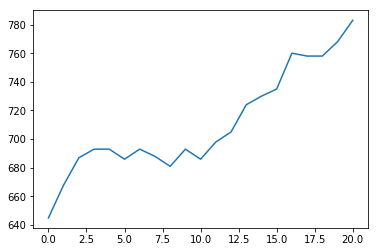

In [33]:
plt.plot(trainingdata[604,:])

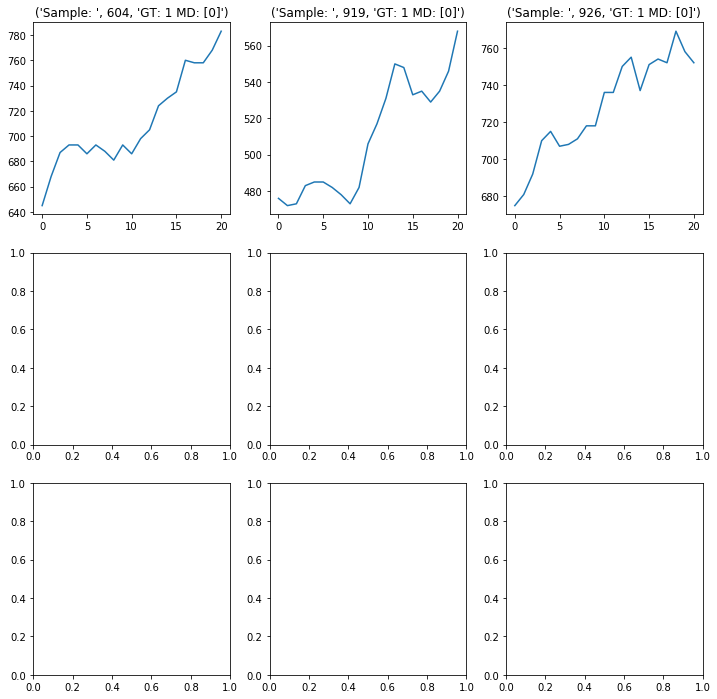

In [35]:
# Plot the data and the predictions
# Create subplot and grid
fig1, axs1 = plt.subplots(3,3,figsize=(12, 12))

axcount = 0
for n in range(1000):
        Xdata_orig = trainingdata[n,:]
        Xdata = Xdata_orig.reshape(1,21)
        Ylabel = traininglabels[n]
        PredClass = model.predict_classes(Xdata)
        if(PredClass != Ylabel):
            pl = axs1.reshape(-1)[axcount].plot(Xdata_orig)
            text = 'Sample: ', n, 'GT: ' + str(Ylabel) + ' MD: ' + str(PredClass)
            axs1.reshape(-1)[axcount].set_title(text)
            axcount= axcount+1
        if(axcount > 8):
            break

It looks like the classifier got three wrong predictions in a set of 1000.  
That's it for this file, lets move on to the [High Noise Example](Tensorflow Week 2 - High Noise.ipynb)